# 04_perceptron

# Q1：Logistic Sigmoid について調べ説明せよ。

# A1. 

シグモイド関数は以下の式で表される。  
<img src="images/sigmid.png" height="30%" width="30%" align="left">

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math


x = np.arange(-10, 10, 0.1)  # -10 ~ 10まで0.1刻み
e = math.e  # 自然対数 
y = 1 / (1 + e**-x)  # シグモイド関数

plt.plot(x, y)
plt.show()

<Figure size 640x480 with 1 Axes>

- 標準シグモイド関数は a=1 を代入して表す。  
- シグモイド関数式の eは自然対数である。
- シグモイド関数の性質は、0から1の単調増加関数で1つの変曲点を持つ。  
- 単調増加関数とは、値の変化が一定に増加する連続関数である。  
- 変曲点とは、曲線の曲がる方向が変わる点である。  

引用：https://ja.wikipedia.org/wiki/%E3%82%B7%E3%82%B0%E3%83%A2%E3%82%A4%E3%83%89%E9%96%A2%E6%95%B0

# Q2：Logistic Sigmoid をアクティベーション関数として持つ、<br>&emsp;&emsp;&emsp;パーセプトロンのモデルについて調べ説明せよ。

# A2.

**パーセプトロンとは：**  
- パーセプトロンとは、視覚や脳の機能をモデル化したものでありパターン認識を行うシンプルなネットワーク。
- ネットワーク構成としては、(感覚層)入力層 → (連合層)中間層 → (反応層)出力層の3つからなる。  
- パターン認識とは、画像・音声などの雑多な情報を含むデータの中から、一定の規則や意味を持つ対象を選別して取り出す処理。  

**アクティベーション(活性化)関数とは：**  
- 伝達関数という意味でも捉えることができるが、入力層から与えられるデータが線形変換した後に、適用される関数
- パーセプトロンでの中間層にあたる。  



引用：  
https://ja.wikipedia.org/wiki/%E3%83%91%E3%83%BC%E3%82%BB%E3%83%97%E3%83%88%E3%83%AD%E3%83%B3  
https://ja.wikipedia.org/wiki/%E3%83%91%E3%82%BF%E3%83%BC%E3%83%B3%E8%AA%8D%E8%AD%98  

### 【Logistic Sigmoidをアクティベーション関数に持つパーセプトロンモデル】

<img src="images/method.png" height="50%" width="50%" align="left">

# Q3：0 を false, 1 を true としたとき、論理否定を行う関数を、<br>&emsp;&emsp;&emsp;Logistic Sigmoid をアクティベーション関数として<br>&emsp;&emsp;&emsp;持つパーセプトロンを用いて作成せよ。<br><br>&emsp;&emsp;&emsp;パーセプトロンのパラメータの調整には、<br>&emsp;&emsp;&emsp;平均二乗誤差と最急降下法を用いること。<br><br>&emsp;&emsp;&emsp;また、調整済みのパラメータを保存し、<br>&emsp;&emsp;&emsp;作成した関数を他のプログラムからいつでも利用できるようにせよ。

# A3. 

<table>
<tbody>
<tr>
<td width="25%">
<img src="images/perseptorn.png"/>
    <p>パーセプトロン構成図</p>
</td>
<td width="25%">
<img src="images/exp_diff.png"/>
    <p>指数微分の確認</p>
</td>
<td width="25%">
<img src="images/param_a.png"/>
    <p>パラメータa 更新式</p>
</td>
<td width="25%">
<img src="images/param_b.png"/>
    <p>パラメータb 更新式</p>
</td>
</tr>
</tbody>
</table>

**用意するデータ**  
入力データ = np.array([0,0,・・・,0])  # 5000個  
正解データ = np.array([1, 1,・・・・,1])  # 5000個  
データ総数nとする  


**入力層(式)**  
$
y= a*X+ b
$

**中間層(シグモイド関数: a=1とする)**  
$ 
S = \frac{1}{1-e^-y}  
$

**誤差関数(平均二乗誤差)**  
平均二乗誤差とは、予測値と真の値の離れ具合の平均を求める。  
引用：http://ebw.eng-book.com/heishin/MeanSquaredError_mean_squared_error_calculation.do?category=mean_squared_error  


**誤差関数式(平均二乗誤差)**  

**※正解データを Z と置く**  
$
平均二乗誤差 = \frac{1}{データの総数(n)}\sum_{i}(予測データ - Z_i)^2
$  

**パラメータ更新式**   
$  
E(a) = \frac{1}{n}\sum_{i}{((\frac{1}{1-e^-(aX_i+b)}) -Z_i)^2}
$


パラメータ更新では、予測値Sと正解データZの誤差が最小になるよう更新する  
最急降下法を使いパラメータ更新を行う。  

**最急降下法**  
$
a^(k+1) = a^(k) - α\frac{d \frac{1}{n}\sum_{i}((\frac{1}{1+e^-(aX_i+b)})-Z_i)^2}{d  a}
$  

**パラメータa 更新式**  
$
a^(k+1) = a^(k) -v\frac{1}{n}*2*\sum_{i}(((\frac{1}{1+e^-(aX_i+b)})-Z_i)*\frac{1}{1+e^-aX_i+b}*(X_i-\frac{1}{1+e^-aX_i+b}))  
$

**パラメータb 更新式**  
$
b^(k+1) =  b^(k) -v\frac{1}{n}*2*\sum_{i}(((\frac{1}{1+e^-(aX_i+b)})-Z_i)*\frac{1}{1+e^-aX_i+b}*(1-\frac{1}{1+e^-aX_i+b}))
$

<img src="images/q4.png" height="100%" width="100%" align="left">

### 入力データ用意

In [2]:
q3_input_data = np.zeros(5000)  # 0の配列
q3_answer = np.ones(5000)  # 1の配列
q3_data = np.stack([q3_input_data, q3_answer],1)

# 学習

誤差 :  0.18109917149760932
誤差 :  0.1704812449225962
誤差 :  0.16065451046505802
誤差 :  0.15156634646120906
誤差 :  0.14316409571516847
誤差 :  0.13539623117159152
誤差 :  0.12821318834356832
誤差 :  0.12156792233486098
誤差 :  0.11541624540121627
誤差 :  0.10971699542465545
誤差 :  0.10443207841859264
誤差 :  0.09952642055968425
誤差 :  0.0949678580483313
誤差 :  0.09072698674487295
誤差 :  0.0867769881648988
誤差 :  0.08309344404448993
誤差 :  0.07965414821921882
誤差 :  0.07643892187299293
誤差 :  0.07342943617459637
誤差 :  0.07060904480260766
誤差 :  0.06796262775346645
誤差 :  0.06547644703876572
誤差 :  0.06313801432927857
誤差 :  0.06093597023565642
誤差 :  0.05885997467930785
誤差 :  0.05690060766699422
誤差 :  0.05504927971086568
誤差 :  0.053298151110858234
誤差 :  0.05164005932425656
誤差 :  0.05006845367552705
誤差 :  0.04857733670116313
誤差 :  0.04716121147276754
誤差 :  0.04581503429347512
誤差 :  0.0445341722151794
誤差 :  0.043314364874646544
誤差 :  0.04215169019560399
誤差 :  0.04104253354875487
誤差 :  0.03998356000380638
誤差 :  0.038971

誤差 :  0.004019406023991565
誤差 :  0.004005258070385747
誤差 :  0.0039912061132174395
誤差 :  0.003977249195675816
誤差 :  0.003963386373478977
誤差 :  0.003949616714670866
誤差 :  0.003935939299422888
誤差 :  0.003922353219838492
誤差 :  0.003908857579763127
誤差 :  0.0038954514945960844
誤差 :  0.0038821340911035685
誤差 :  0.0038689045072434545
誤差 :  0.003855761891985069
誤差 :  0.0038427054051339083
誤差 :  0.003829734217163221
誤差 :  0.0038168475090480107
誤差 :  0.003804044472097625
誤差 :  0.0037913243077945906
誤差 :  0.0037786862276408305
誤差 :  0.003766129452996836
誤差 :  0.003753653214932395
誤差 :  0.0037412567540755495
誤差 :  0.0037289393204676478
誤差 :  0.003716700173417164
誤差 :  0.003704538581359595
誤差 :  0.003692453821715656
誤差 :  0.003680445180759031
誤差 :  0.003668511953478447
誤差 :  0.003656653443450195
誤差 :  0.003644868962704217
誤差 :  0.0036331578315994067
誤差 :  0.0036215193787004964
誤差 :  0.003609952940652267
誤差 :  0.003598457862062941
誤差 :  0.003587033495383238
誤差 :  0.003575679200789886
誤差 :  0.00356439

誤差 :  0.001920876469478611
誤差 :  0.0019175059369109313
誤差 :  0.0019141469473852623
誤差 :  0.0019107994423956125
誤差 :  0.0019074633638281235
誤差 :  0.0019041386539565862
誤差 :  0.001900825255441027
誤差 :  0.0018975231113228816
誤差 :  0.001894232165023271
誤差 :  0.0018909523603382603
誤差 :  0.0018876836414369188
誤差 :  0.0018844259528584587
誤差 :  0.00188117923950756
誤差 :  0.0018779434466533107
誤差 :  0.0018747185199252646
誤差 :  0.0018715044053105282
誤差 :  0.0018683010491510525
誤差 :  0.0018651083981405037
誤差 :  0.0018619263993213994
誤差 :  0.0018587550000823707
誤差 :  0.0018555941481561255
誤差 :  0.0018524437916151203
誤差 :  0.0018493038788697416
誤差 :  0.0018461743586654787
誤差 :  0.0018430551800802835
誤差 :  0.0018399462925220895
誤差 :  0.0018368476457252605
誤差 :  0.001833759189748857
誤差 :  0.001830680874974023
誤差 :  0.001827612652100223
誤差 :  0.0018245544721449572
誤差 :  0.0018215062864389221
誤差 :  0.00181846804662481
誤差 :  0.0018154397046544354
誤差 :  0.001812421212786425
誤差 :  0.0018094125235832137
誤差 

誤差 :  0.00122633484765466
誤差 :  0.0012249352211615204
誤差 :  0.0012235387289498542
誤差 :  0.0012221453605994598
誤差 :  0.0012207551057370307
誤差 :  0.0012193679540336002
誤差 :  0.0012179838952067197
誤差 :  0.0012166029190183833
誤差 :  0.001215225015275711
誤差 :  0.0012138501738301318
誤差 :  0.0012124783845779417
誤差 :  0.0012111096374593357
誤差 :  0.0012097439224580812
誤差 :  0.0012083812296020565
誤差 :  0.0012070215489628077
誤差 :  0.0012056648706542832
誤差 :  0.0012043111848341094
誤差 :  0.0012029604817022505
誤差 :  0.001201612751501042
誤差 :  0.0012002679845153357
誤差 :  0.0011989261710721457
誤差 :  0.0011975873015401828
誤差 :  0.0011962513663296656
誤差 :  0.001194918355891918
誤差 :  0.0011935882607199693
誤差 :  0.0011922610713475162
誤差 :  0.0011909367783487662
誤差 :  0.001189615372338913
誤差 :  0.0011882968439725376
誤差 :  0.0011869811839453391
誤差 :  0.0011856683829920707
誤差 :  0.001184358431887722
誤差 :  0.0011830513214458453
誤差 :  0.0011817470425199384
誤差 :  0.001180445586002481
誤差 :  0.0011791469428243334


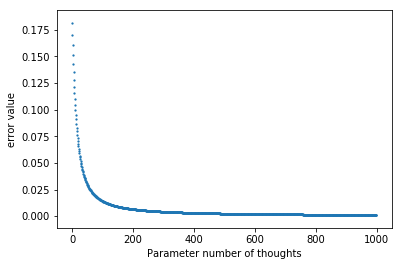

In [3]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json


class Neuron:

    def __init__(self, a, b, v):
        self._a = a  # 重みパラメータ
        self._b = b  # バイアス
        self._v = v  # ハイパーパラメータ
        self._error = None  

    def input_layer(self, x):
        """線形変換
        param1 : x (入力値)
        return : 入力値
        """
        y = self._a*x + self._b
        return y

    def activation_function(self, y):
        """活性化関数
        param1 : y (入力層の計算結果)
        return : 出力値
        """
        s = 1 / (1 + math.e**-y)  # シグモイド関数
        return s

    def error_function(self, s, answer):
        """誤差関数
        param1 :  s (出力値)
        param2 :  answer (正解値)
        return : 誤差
        """
        error = sum((s - answer)**2)/len(answer)  # 平均二乗誤差関数
        return error

    def parameter_update(self, input_data, answer, predicted_data):
        """パラメータ更新
        param1 : input_data(入力値)
        param2 : answer (正解値)
        param3 : predicted_data (予測データ)
        return : 更新済みパラメータ
        """
        self._a = self._a - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(input_data-predicted_data)))))  # 重みパラメータ
        self._b = self._b - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(1-predicted_data))))) # バイアス
        return self._a, self._b
    

if __name__=='__main__':
    np.random.shuffle(q3_data)  # 入力データをシャッフル
    a = 0.5   # 初期値のパラメータ
    b = 0.3  # バイアス
    v = 0.5  # ハイパーパラメータ(調整項)
    error_list = []  # 誤差リスト(出力用に集計)
    neuron = Neuron(a, b, v)  # インスタンス化 
    parameter = {"a":[], "b":[]}


    for _ in range(1000):
        # 最後のパラメータを保存
        parameter["a"].append(a)
        parameter["b"].append(b)
        y = neuron.input_layer(q3_data[:,0])  # 入力層
        s = neuron.activation_function(y)  # 中間層
        error = neuron.error_function(s, q3_data[:,1])  # 出力層　： 誤差関数

        a, b = neuron.parameter_update(q3_data[:,0], q3_data[:,1], s)  # パラメータ更新(引数: 入力x , 正解z, 出力s)
        parameter["a"].append(a)
        parameter["b"].append(b)
            
        print("誤差 : ", error)
        error_list.append(error)

    # 更新済みパラメータ保存
    print("書き出し parameter['a'][-1] : ", parameter['a'][-1])
    print("書き出し parameter['b'][-1] : ", parameter['b'][-1])
    
    with open('output/output_Q3.json', 'w') as f:
        json.dump(parameter, f)
            
    # 描画
    print("学習回数 : %s 回" % len(error_list))
    plt.scatter(np.arange(len(error_list)),error_list, s=1.5)

    plt.xlabel('Parameter number of thoughts')
    plt.ylabel('error value')
    plt.show()

# Q4. 真の入力値が 0 のとき関数の受け取る入力が平均 0 標準偏差 0.5 の<br>&emsp;&emsp;正規分布に従い、真の入力値が 1 のとき関数の受け取る入力が<br>&emsp;&emsp;平均 1 分散 0.5 の正規分布に従うとする。<br><br>&emsp;&emsp;この時、問題 3 で作成した論理否定を行う関数の正解率を求め、<br>&emsp;&emsp;その結果について考察し、必要があれば正解率を改善せよ。

# ----------------------------------------------------------------------
# 学習データ(入力値)作成

## 真の値が0の時に入力値は「平均0, 標準偏差√0.01の正規分布に従う」

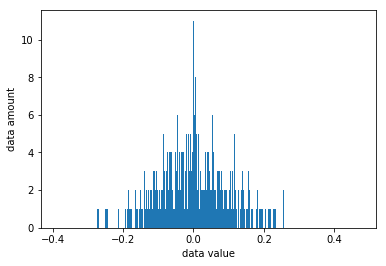

In [4]:
# 真の入力値が 0の時
input_0_data = np.random.normal(0, math.sqrt(0.01), (1,5000))

plt.hist(input_0_data[0], 5000)
plt.xlabel('data value')
plt.ylabel('data amount')
plt.show()

##  真の入力値は「 1 のとき関数の受け取る入力が平均 1 標準偏差√0.01 の正規分布に従う」

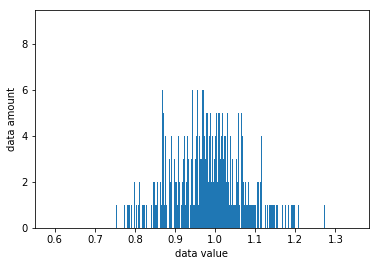

In [5]:
# 真の入力値が 1の時
input_1_data = np.random.normal(1, math.sqrt(0.01), (1,5000))
plt.hist(input_1_data[0], 5000)
plt.xlabel('data value')
plt.ylabel('data amount')
plt.show()

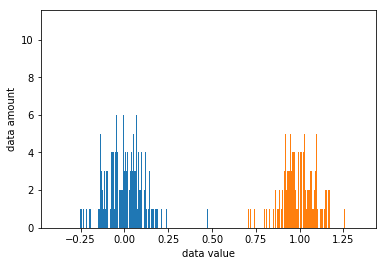

In [6]:
plt.hist(input_0_data[0], 5000)
plt.hist(input_1_data[0], 5000)
plt.xlabel('data value')
plt.ylabel('data amount')
plt.show()

In [7]:
# 入力値を結合して準備
input_data = np.concatenate([input_0_data[0], input_1_data[0]])
input_data

array([-0.0813594 ,  0.04382877,  0.14003766, ...,  1.11546166,
        0.92902985,  1.20807088])

### 作成済みデータを保存

In [8]:
# print(type(input_1_data))
# #csvファイルとして保存
# np.savetxt('input_0_data.csv',input_0_data,delimiter=',')
# np.savetxt('input_1_data.csv',input_1_data,delimiter=',')

### 正解データを作る

In [9]:
# 正解データを作る
answer_0 = np.zeros(5000)  # 0の配列
answer_1 = np.ones(5000)  # 1の配列
answer = np.concatenate([answer_1, answer_0])  # 1,0配列を横に結合
answer

array([1., 1., 1., ..., 0., 0., 0.])

# 学習

誤差 :  0.3286754076146444
誤差 :  0.3264404597065515
誤差 :  0.3242030853960591
誤差 :  0.3219639869603747
誤差 :  0.319723873026957
誤差 :  0.31748345724175103
誤差 :  0.3152434569052471
誤差 :  0.3130045915821676
誤差 :  0.31076758169091656
誤差 :  0.30853314707904345
誤差 :  0.3063020055912778
誤差 :  0.3040748716366807
誤差 :  0.30185245476162864
誤差 :  0.29963545823528775
誤差 :  0.2974245776542385
誤差 :  0.29522049957279006
誤差 :  0.2930239001653367
誤差 :  0.2908354439269664
誤差 :  0.28865578241820783
誤差 :  0.28648555305952716
誤差 :  0.28432537798080254
誤差 :  0.28217586293063557
誤差 :  0.28003759624991414
誤差 :  0.27791114791355576
誤差 :  0.27579706864390663
誤差 :  0.27369588909873915
誤差 :  0.2716081191362652
誤差 :  0.269534247159039
誤差 :  0.267474739538146
誤差 :  0.2654300401184099
誤差 :  0.2634005698050023
誤差 :  0.26138672623115383
誤差 :  0.2593888835062953
誤差 :  0.2574073920434202
誤差 :  0.2554425784640384
誤差 :  0.2534947455786699
誤差 :  0.2515641724404426
誤差 :  0.24965111446903812
誤差 :  0.24775580364186195
誤差 :  0.245

誤差 :  0.058370227607010876
誤差 :  0.05814146654195937
誤差 :  0.057913977007555364
誤差 :  0.057687751853884014
誤差 :  0.057462783962504024
誤差 :  0.05723906624638448
誤差 :  0.05701659164985125
誤差 :  0.056795353148528474
誤差 :  0.05657534374928572
誤差 :  0.056356556490185346
誤差 :  0.056138984440432194
誤差 :  0.055922620700324464
誤差 :  0.05570745840120421
誤差 :  0.055493490705413116
誤差 :  0.055280710806245074
誤差 :  0.05506911192789979
誤差 :  0.054858687325442385
誤差 :  0.05464943028475741
誤差 :  0.054441334122505625
誤差 :  0.054234392186083565
誤差 :  0.05402859785357914
誤差 :  0.053823944533733244
誤差 :  0.053620425665894825
誤差 :  0.05341803471998256
誤差 :  0.053216765196441154
誤差 :  0.05301661062620185
誤差 :  0.05281756457064065
誤差 :  0.05261962062153557
誤差 :  0.05242277240102801
誤差 :  0.052227013561577565
誤差 :  0.0520323377859217
誤差 :  0.05183873878703308
誤差 :  0.05164621030807534
誤差 :  0.051454746122360874
誤差 :  0.05126434003330567
誤差 :  0.05107498587438671
誤差 :  0.050886677509095285
誤差 :  0.050699408830

誤差 :  0.022761011127297257
誤差 :  0.022716493005718538
誤差 :  0.022672158928191882
誤差 :  0.022628007894579683
誤差 :  0.02258403891107894
誤差 :  0.022540250990177868
誤差 :  0.022496643150612793
誤差 :  0.0224532144173271
誤差 :  0.022409963821426467
誤差 :  0.022366890400139196
誤差 :  0.0223239931967733
誤差 :  0.02228127126067443
誤差 :  0.02223872364718687
誤差 :  0.022196349417610305
誤差 :  0.022154147639161164
誤差 :  0.022112117384930453
誤差 :  0.02207025773384566
誤差 :  0.0220285677706293
誤差 :  0.02198704658576026
誤差 :  0.021945693275434674
誤差 :  0.021904506941526326
誤差 :  0.021863486691548643
誤差 :  0.0218226316386156
誤差 :  0.02178194090140411
誤差 :  0.021741413604116137
誤差 :  0.021701048876440254
誤差 :  0.021660845853515177
誤差 :  0.02162080367589221
誤差 :  0.021580921489498323
誤差 :  0.02154119844559976
誤差 :  0.02150163370076572
誤差 :  0.021462226416831126
誤差 :  0.021422975760862866
誤差 :  0.02138388090512243
誤差 :  0.02134494102703074
誤差 :  0.02130615530913415
誤差 :  0.02126752293906787
誤差 :  0.02122904310952

誤差 :  0.014231857143057204
誤差 :  0.014217189272801224
誤差 :  0.014202561401482185
誤差 :  0.014187973373926622
誤差 :  0.01417342503572148
誤差 :  0.014158916233209713
誤差 :  0.014144446813484831
誤差 :  0.014130016624388526
誤差 :  0.014115625514504078
誤差 :  0.01410127333315403
誤差 :  0.014086959930394428
誤差 :  0.014072685157011742
誤差 :  0.014058448864518036
誤差 :  0.0140442509051463
誤差 :  0.014030091131847737
誤差 :  0.014015969398286598
誤差 :  0.01400188555883588
誤差 :  0.01398783946857406
誤差 :  0.013973830983280575
最終パラメータ a :  -6.7665842848985545
最終パラメータ b :  1.9290100820976512
最終誤差:  0.013973830983280575
学習回数 : 1000 回


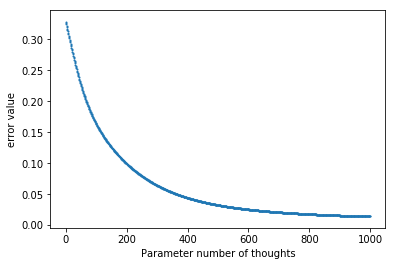

In [10]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json


class Neuron:

    def __init__(self, a, b, v):
        self._a = a  # 重みパラメータ
        self._b = b  # バイアス
        self._v = v  # ハイパーパラメータ
        self._error = None  

    def input_layer(self, x):
        """線形変換
        param1 : x (入力値)
        return : 入力値
        """
        y = self._a*x + self._b
        return y

    def activation_function(self, y):
        """活性化関数
        param1 : y (入力層の計算結果)
        return : 出力値
        """
        s = 1 / (1 + math.e**-y)  # シグモイド関数
        return s

    def error_function(self, s, answer):
        """誤差関数
        param1 :  s (出力値)
        param2 :  answer (正解値)
        return : 誤差
        """
        error = sum((s - answer)**2)/len(answer)  # 平均二乗誤差関数
        return error

    def parameter_update(self, input_data, answer, predicted_data):
        """パラメータ更新
        param1 : input_data(入力値)
        param2 : answer (正解値)
        param3 : predicted_data (予測データ)
        return : 更新済みパラメータ
        """
        self._a = self._a - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(input_data-predicted_data)))))  # 重みパラメータ
        self._b = self._b - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(1-predicted_data))))) # バイアス
        return self._a, self._b

if __name__=='__main__':
    data = np.stack([input_data, answer],1)  # [入力データ , 正解データ] 
    
    a = 0.5   # 初期値のパラメータ
    b = 0.3  # バイアス
    v = 0.1  # ハイパーパラメータ(調整項)
    error_list = []  # 誤差リスト(出力用に集計)
    neuron = Neuron(a, b, v)  # インスタンス化 
    parameter = {"a":[], "b":[]}

    for _ in range(1000):
        y = neuron.input_layer(data[:,0])  # 入力層
        s = neuron.activation_function(y)  # 中間層
        error = neuron.error_function(s, data[:,1])  # 出力層　： 誤差関数

        a, b = neuron.parameter_update(data[:,0], data[:,1], s)  # パラメータ更新(引数: 入力x , 正解z, 出力s)
        parameter["a"].append(a)
        parameter["b"].append(b)

        print("誤差 : ", error)
        error_list.append(error)

    # 更新済みパラメータ保存
    # print("書き出し parameter : ", parameter)
    with open('output/output_Q4.json', 'w') as f:
        json.dump(parameter, f)
            
    # 描画
    print("最終パラメータ a : ", parameter["a"][-1])
    print("最終パラメータ b : ", parameter["b"][-1])
    print("最終誤差: ", error_list[-1])
    print("学習回数 : %s 回" % len(error_list))
    plt.scatter(np.arange(len(error_list)),error_list, s=1, marker='o')
    plt.xlabel('Parameter number of thoughts')
    plt.ylabel('error value')
    plt.show()



# Q5 <br><br>0 を false, 1 を true としたとき、論理和、論理積<br>を実現するパーセプトロンを問 3, 4 のときと同様に作成せよ。

<table>
<tbody>
<tr>
<td width="25%">
<img src="images/q5_.png"/>
    <p>論理和、論理積、Q6:排他的論理和</p>
</td>
<td width="25%">
<img src="images/q5_parseptron.png"/>
    <p>多項式パーセプトリン</p>
</td>
<td width="25%">
<img src="images/q5_param_a.png"/>
    <p>パラメータa1、a2 更新式</p>
</td>
<td width="25%">
<img src="images/q5_param_b.png"/>
    <p>パラメータb 更新式</p>
</td>
</tr>
</tbody>
</table>

# A 「論理和」+「Q3: 入力値分散なし」

# 入力データ

In [11]:
# 入力データ作成 [入力A, 入力B, 正解値]
q5_data_OR = np.array([[1,1,1],
                                    [1,0,1],
                                    [0,1,1],
                                    [0,0,0]])

誤差 :  0.14202062607837013
誤差 :  0.14164274627667206
誤差 :  0.14126925435211812
誤差 :  0.14090005876963285
誤差 :  0.14053507028305307
誤差 :  0.14017420187306995
誤差 :  0.13981736868690608
誤差 :  0.13946448797968325
誤差 :  0.13911547905743682
誤差 :  0.13877026322173444
誤差 :  0.13842876371585594
誤差 :  0.1380909056724935
誤差 :  0.1377566160629306
誤差 :  0.13742582364766004
誤差 :  0.1370984589284014
誤差 :  0.13677445410147937
誤差 :  0.13645374301252572
誤差 :  0.1361362611124671
誤差 :  0.13582194541476325
誤差 :  0.1355107344538603
誤差 :  0.1352025682448243
誤差 :  0.1348973882441217
誤差 :  0.1345951373115141
誤差 :  0.1342957596730346
誤差 :  0.13399920088501568
誤差 :  0.13370540779913692
誤差 :  0.13341432852846435
誤差 :  0.13312591241445146
誤差 :  0.1328401099948745
誤差 :  0.13255687297267438
誤差 :  0.13227615418567948
誤差 :  0.13199790757718216
誤差 :  0.13172208816734549
誤差 :  0.13144865202541395
誤差 :  0.13117755624270683
誤差 :  0.13090875890636863
誤差 :  0.1306422190738566
誤差 :  0.1303778967481411
誤差 :  0.1301157528536008

誤差 :  0.08891734302528599
誤差 :  0.08885712591517045
誤差 :  0.08879721270375072
誤差 :  0.0887376026686983
誤差 :  0.08867829508647752
誤差 :  0.0886192892323417
誤差 :  0.08856058438032952
誤差 :  0.0885021798032623
誤差 :  0.08844407477274167
誤差 :  0.08838626855914775
誤差 :  0.08832876043163798
誤差 :  0.08827154965814668
誤差 :  0.08821463550538453
誤差 :  0.08815801723883933
誤差 :  0.08810169412277669
誤差 :  0.08804566542024145
誤差 :  0.08798993039305958
誤差 :  0.08793448830184042
誤差 :  0.08787933840597961
誤差 :  0.08782447996366245
誤差 :  0.08776991223186728
誤差 :  0.08771563446636996
誤差 :  0.08766164592174833
誤差 :  0.08760794585138706
誤差 :  0.08755453350748331
誤差 :  0.08750140814105237
誤差 :  0.08744856900193387
誤差 :  0.08739601533879857
誤差 :  0.08734374639915497
誤差 :  0.08729176142935682
誤差 :  0.08724005967461099
誤差 :  0.08718864037898515
誤差 :  0.08713750278541642
誤差 :  0.0870866461357199
誤差 :  0.087036069670598
誤差 :  0.0869857726296494
誤差 :  0.0869357542513792
誤差 :  0.08688601377320845
誤差 :  0.086836550431

誤差 :  0.08099428022286373
誤差 :  0.0809947743514463
誤差 :  0.08099532878659385
誤差 :  0.08099594308680114
誤差 :  0.08099661681247806
誤差 :  0.08099734952594681
誤差 :  0.08099814079143908
誤差 :  0.08099899017509328
誤差 :  0.08099989724495157
誤差 :  0.0810008615709571
誤差 :  0.08100188272495093
誤差 :  0.08100296028066911
誤差 :  0.08100409381373953
誤差 :  0.08100528290167901
誤差 :  0.08100652712389
誤差 :  0.08100782606165755
誤差 :  0.08100917929814588
誤差 :  0.08101058641839551
誤差 :  0.08101204700931958
誤差 :  0.0810135606597007
誤差 :  0.08101512696018763
誤差 :  0.08101674550329181
誤差 :  0.08101841588338383
誤差 :  0.08102013769669009
誤差 :  0.08102191054128921
誤差 :  0.08102373401710847
誤差 :  0.0810256077259203
誤差 :  0.08102753127133855
誤差 :  0.08102950425881478
誤差 :  0.08103152629563479
誤差 :  0.08103359699091472
誤差 :  0.08103571595559722
誤差 :  0.08103788280244784
誤差 :  0.08104009714605104
誤差 :  0.08104235860280644
誤差 :  0.08104466679092495
誤差 :  0.08104702133042455
誤差 :  0.08104942184312681
誤差 :  0.08105186795

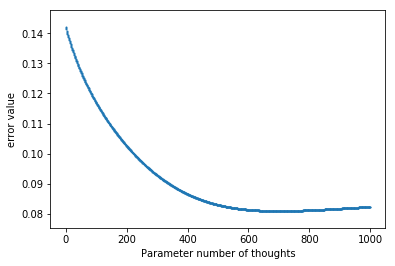

In [12]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json


class Neuron:

    def __init__(self, a1, a2, b, v):
        self._a1 = a1  # 重みパラメータa1
        self._a2 = a2  # 重みパラメータa2        
        self._b = b  # バイアス
        self._v = v  # ハイパーパラメータ
        self._error = None  

    def input_layer(self, x1, x2):
        """線形変換
        param1 : x (入力値)
        return : 入力値
        """
        y = self._a1*x1 + self._a2*x2 + self._b
        return y

    def activation_function(self, y):
        """活性化関数
        param1 : y (入力層の計算結果)
        return : 出力値
        """
        s = 1 / (1 + math.e**-y)  # シグモイド関数
        return s

    def error_function(self, s, answer):
        """誤差関数
        param1 :  s (出力値)
        param2 :  answer (正解値)
        return : 誤差
        """
        error = sum((s - answer)**2)/len(answer)  # 平均二乗誤差関数
        return error

    def parameter_update(self, x1, x2, answer, predicted_data):
        """パラメータ更新
        param1 : x1(入力1)
        param2 : x2(入力2)
        param3 : answer (正解値)
        param4 : predicted_data (予測データ)
        return : 更新済みパラメータ
        """
        self._a1 = self._a1 - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(x1-predicted_data)))))  # 重みパラメータa1
        self._a2 = self._a2 - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(x2-predicted_data)))))  # 重みパラメータa2       
        self._b = self._b - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(1-predicted_data))))) # バイアス
        return self._a1, self._a2, self._b

if __name__=='__main__':
    data = q5_data_OR  # [入力1, 入力2 , 正解データ] 
    
    a1 = 0.5   # 初期値のパラメータa1
    a2 = 0.5   # 初期値のパラメータa2
    b = 0.3  # バイアス
    v = 0.1  # ハイパーパラメータ(調整項)
    error_list = []  # 誤差リスト(出力用に集計)
    neuron = Neuron(a1, a2, b, v)  # インスタンス化 
    parameter = {"a1":[], "a2":[], "b":[]}

    for _ in range(1000):
        y = neuron.input_layer(data[:,0], data[:,1])  # 入力層
        s = neuron.activation_function(y)  # 中間層
        error = neuron.error_function(s, data[:,2])  # 出力層　： 誤差関数

        a1, a2, b = neuron.parameter_update(data[:,0], data[:,1], data[:,2], s)  # パラメータ更新(引数: 入力x , 正解z, 出力s)
        parameter["a1"].append(a1)        
        parameter["a2"].append(a2)
        parameter["b"].append(b)

        print("誤差 : ", error)
        error_list.append(error)

    # 更新済みパラメータ保存
    # print("書き出し parameter : ", parameter)
    with open('output/output_Q4.json', 'w') as f:
        json.dump(parameter, f)
            
    # 描画
    print("最終パラメータ a 1: ", parameter["a1"][-1])
    print("最終パラメータ a 2: ", parameter["a2"][-1])
    print("最終パラメータ b : ", parameter["b"][-1])
    print("最終誤差: ", error_list[-1])
    print("学習回数 : %s 回" % len(error_list))
    plt.scatter(np.arange(len(error_list)),error_list, s=1, marker='o')
    plt.xlabel('Parameter number of thoughts')
    plt.ylabel('error value')
    plt.show()



# A 「論理積」+「Q3: 入力値分散なし」

# 入力データ

In [13]:
# 入力データ作成 [入力A, 入力B, 正解値]
q5_data_AND = np.array([[1,1,1],
                                    [1,0,0],
                                    [0,1,0],
                                    [0,0,0]])

誤差 :  0.33199510720598263
誤差 :  0.3311352622570949
誤差 :  0.33027141417460865
誤差 :  0.329403591330856
誤差 :  0.3285318244876549
誤差 :  0.3276561466604888
誤差 :  0.3267765929865267
誤差 :  0.3258932005964934
誤差 :  0.3250060084903959
誤差 :  0.3241150574171001
誤差 :  0.32322038975775086
誤差 :  0.3223220494130163
誤差 :  0.3214200816941386
誤差 :  0.3205145332177619
誤差 :  0.3196054518045107
誤差 :  0.31869288638128107
誤差 :  0.31777688688720945
誤差 :  0.31685750418327696
誤差 :  0.31593478996550595
誤差 :  0.3150087966817008
誤差 :  0.3140795774516881
誤差 :  0.3131471859909998
誤差 :  0.3122116765379527
誤差 :  0.3112731037840646
誤差 :  0.31033152280775533
誤差 :  0.3093869890112723
誤差 :  0.30843955806078527
誤差 :  0.30748928582958734
誤差 :  0.3065362283443453
誤差 :  0.30558044173433524
誤差 :  0.3046219821836026
誤差 :  0.3036609058859847
誤差 :  0.3026972690029309
誤差 :  0.3017311276240573
誤差 :  0.30076253773037304
誤差 :  0.2997915551601117
誤差 :  0.29881823557710385
誤差 :  0.29784263444162645
誤差 :  0.29686480698366274
誤差 :  0.295

誤差 :  0.0859088997755169
誤差 :  0.08576324522530003
誤差 :  0.08561886114907745
誤差 :  0.08547573102827725
誤差 :  0.08533383855269008
誤差 :  0.08519316761862483
誤差 :  0.0850537023270509
誤差 :  0.08491542698172848
誤差 :  0.08477832608732792
誤差 :  0.08464238434753969
誤差 :  0.0845075866631762
誤差 :  0.0843739181302661
誤差 :  0.08424136403814292
誤差 :  0.08410990986752888
誤差 :  0.08397954128861436
誤差 :  0.0838502441591351
誤差 :  0.0837220045224473
誤差 :  0.08359480860560173
誤差 :  0.08346864281741773
誤差 :  0.08334349374655844
誤差 :  0.08321934815960733
誤差 :  0.0830961929991472
誤差 :  0.08297401538184257
誤差 :  0.08285280259652594
誤差 :  0.08273254210228873
誤差 :  0.08261322152657744
誤差 :  0.08249482866329598
誤差 :  0.08237735147091442
誤差 :  0.08226077807058466
誤差 :  0.08214509674426451
誤差 :  0.0820302959328492
誤差 :  0.0819163642343124
誤差 :  0.08180329040185566
誤差 :  0.08169106334206834
誤差 :  0.08157967211309705
誤差 :  0.08146910592282601
誤差 :  0.08135935412706811
誤差 :  0.0812504062277674
誤差 :  0.08114225187121

誤差 :  0.06269863147383468
誤差 :  0.06266050107676244
誤差 :  0.06262242687293161
誤差 :  0.06258440864884791
誤差 :  0.06254644619274521
誤差 :  0.0625085392945659
誤差 :  0.062470687745941396
誤差 :  0.062432891340172915
誤差 :  0.062395149872212625
誤差 :  0.062357463138644965
誤差 :  0.06231983093766814
誤差 :  0.06228225306907598
誤差 :  0.062244729334240016
誤差 :  0.062207259536091755
誤差 :  0.06216984347910515
誤差 :  0.06213248096927943
誤差 :  0.062095171814122024
誤差 :  0.06205791582263183
誤差 :  0.062020712805282506
誤差 :  0.06198356257400623
誤差 :  0.06194646494217754
誤差 :  0.0619094197245973
誤差 :  0.06187242673747709
誤差 :  0.06183548579842356
誤差 :  0.061798596726423266
誤差 :  0.0617617593418273
誤差 :  0.06172497346633666
誤差 :  0.06168823892298725
誤差 :  0.061651555536135424
誤差 :  0.06161492313144375
誤差 :  0.061578341535866644
誤差 :  0.06154181057763645
誤差 :  0.061505330086249616
誤差 :  0.061468899892453126
誤差 :  0.061432519828230996
誤差 :  0.061396189726790944
誤差 :  0.06135990942255127
誤差 :  0.06132367875112798


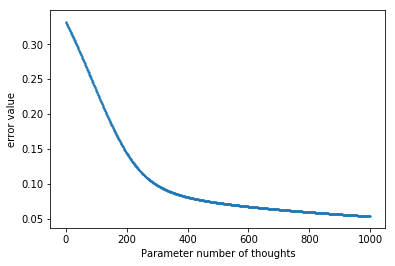

In [14]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json


class Neuron:

    def __init__(self, a1, a2, b, v):
        self._a1 = a1  # 重みパラメータa1
        self._a2 = a2  # 重みパラメータa2        
        self._b = b  # バイアス
        self._v = v  # ハイパーパラメータ
        self._error = None  

    def input_layer(self, x1, x2):
        """線形変換
        param1 : x (入力値)
        return : 入力値
        """
        y = self._a1*x1 + self._a2*x2 + self._b
        return y

    def activation_function(self, y):
        """活性化関数
        param1 : y (入力層の計算結果)
        return : 出力値
        """
        s = 1 / (1 + math.e**-y)  # シグモイド関数
        return s

    def error_function(self, s, answer):
        """誤差関数
        param1 :  s (出力値)
        param2 :  answer (正解値)
        return : 誤差
        """
        error = sum((s - answer)**2)/len(answer)  # 平均二乗誤差関数
        return error

    def parameter_update(self, x1, x2, answer, predicted_data):
        """パラメータ更新
        param1 : x1(入力1)
        param2 : x2(入力2)
        param3 : answer (正解値)
        param4 : predicted_data (予測データ)
        return : 更新済みパラメータ
        """
        self._a1 = self._a1 - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(x1-predicted_data)))))  # 重みパラメータa1
        self._a2 = self._a2 - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(x2-predicted_data)))))  # 重みパラメータa2       
        self._b = self._b - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(1-predicted_data))))) # バイアス
        return self._a1, self._a2, self._b

if __name__=='__main__':
    data = q5_data_AND  # [入力1, 入力2 , 正解データ] 
    
    a1 = 0.5   # 初期値のパラメータa1
    a2 = 0.5   # 初期値のパラメータa2
    b = 0.3  # バイアス
    v = 0.1  # ハイパーパラメータ(調整項)
    error_list = []  # 誤差リスト(出力用に集計)
    neuron = Neuron(a1, a2, b, v)  # インスタンス化 
    parameter = {"a1":[], "a2":[], "b":[]}

    for _ in range(1000):
        y = neuron.input_layer(data[:,0], data[:,1])  # 入力層
        s = neuron.activation_function(y)  # 中間層
        error = neuron.error_function(s, data[:,2])  # 出力層　： 誤差関数

        a1, a2, b = neuron.parameter_update(data[:,0], data[:,1], data[:,2], s)  # パラメータ更新(引数: 入力x , 正解z, 出力s)
        parameter["a1"].append(a1)        
        parameter["a2"].append(a2)
        parameter["b"].append(b)

        print("誤差 : ", error)
        error_list.append(error)

    # 更新済みパラメータ保存
    # print("書き出し parameter : ", parameter)
    with open('output/output_Q4.json', 'w') as f:
        json.dump(parameter, f)
            
    # 描画
    print("最終パラメータ a 1: ", parameter["a1"][-1])
    print("最終パラメータ a 2: ", parameter["a2"][-1])
    print("最終パラメータ b : ", parameter["b"][-1])
    print("最終誤差: ", error_list[-1])
    print("学習回数 : %s 回" % len(error_list))
    plt.scatter(np.arange(len(error_list)),error_list, s=1, marker='o')
    plt.xlabel('Parameter number of thoughts')
    plt.ylabel('error value')
    plt.show()



# Q6.<br><br>0 を false, 1 を true としたとき、<br>排他的論理和を実現するパーセプトロンを<br>問 3, 4 のときと同様に作成せよ。<br><br>作成できない場合には、その理由について述べよ。

# A 「排他的論理和」+「Q3: 入力値分散なし」

# 入力データ

In [15]:
# 入力データ作成 [入力A, 入力B, 正解値]
q5_data_XOR = np.array([[1,1,0],
                                    [1,0,1],
                                    [0,1,1],
                                    [0,0,0]])

誤差 :  0.28493811759964943
誤差 :  0.28465389138141234
誤差 :  0.2843700996367871
誤差 :  0.28408676121485327
誤差 :  0.28380389495861885
誤差 :  0.2835215197030054
誤差 :  0.28323965427271325
誤差 :  0.2829583174799718
誤差 :  0.2826775281221688
誤差 :  0.2823973049793626
誤差 :  0.282117666811675
誤差 :  0.2818386323565646
誤差 :  0.2815602203259833
誤差 :  0.2812824494034131
誤差 :  0.28100533824078516
誤差 :  0.28072890545528284
誤差 :  0.2804531696260275
誤差 :  0.28017814929065
誤差 :  0.2799038629417473
誤差 :  0.27963032902322726
誤差 :  0.2793575659265428
誤差 :  0.2790855919868156
誤差 :  0.2788144254788534
誤差 :  0.2785440846130628
誤差 :  0.278274587531258
誤差 :  0.27800595230237035
誤差 :  0.27773819691806
誤差 :  0.2774713392882329
誤差 :  0.2772053972364671
誤差 :  0.27694038849534963
誤差 :  0.27667633070173003
誤差 :  0.2764132413918918
誤差 :  0.2761511379966474
誤差 :  0.2758900378363602
誤差 :  0.27562995811589663
誤差 :  0.27537091591951524
誤差 :  0.27511292820569444
誤差 :  0.27485601180190633
誤差 :  0.2746001833993389
誤差 :  0.27434545

誤差 :  0.2503075418487426
誤差 :  0.250306065950605
誤差 :  0.25030460851151876
誤差 :  0.2503031689867058
誤差 :  0.25030174684525197
誤差 :  0.2503003415698244
誤差 :  0.2502989526563892
誤差 :  0.2502975796139364
誤差 :  0.2502962219642095
誤差 :  0.2502948792414389
誤差 :  0.25029355099208017
誤差 :  0.2502922367745571
誤差 :  0.2502909361590093
誤差 :  0.2502896487270436
誤差 :  0.2502883740714906
誤差 :  0.2502871117961648
誤差 :  0.2502858615156294
誤差 :  0.25028462285496533
誤差 :  0.25028339544954403
誤差 :  0.25028217894480437
誤差 :  0.2502809729960343
誤差 :  0.25027977726815487
誤差 :  0.2502785914355102
誤差 :  0.2502774151816592
誤差 :  0.2502762481991723
誤差 :  0.2502750901894326
誤差 :  0.25027394086243815
誤差 :  0.25027279993661056
誤差 :  0.25027166713860566
誤差 :  0.250270542203128
誤差 :  0.25026942487274884
誤差 :  0.2502683148977274
誤差 :  0.2502672120358361
誤差 :  0.2502661160521876
誤差 :  0.2502650267190673
誤差 :  0.25026394381576667
誤差 :  0.2502628671284213
誤差 :  0.25026179644985164
誤差 :  0.25026073157940665
誤差 :  0.25025

誤差 :  0.2500372520321101
誤差 :  0.2500369605602464
誤差 :  0.2500366710626249
誤差 :  0.25003638352953933
誤差 :  0.2500360979512844
誤差 :  0.25003581431815647
誤差 :  0.2500355326204542
誤差 :  0.2500352528484797
誤差 :  0.2500349749925389
誤差 :  0.2500346990429423
誤差 :  0.25003442499000583
誤差 :  0.25003415282405134
誤差 :  0.2500338825354075
誤差 :  0.25003361411441033
誤差 :  0.2500333475514037
誤差 :  0.2500330828367405
誤差 :  0.25003281996078264
誤差 :  0.2500325589139022
誤差 :  0.25003229968648155
誤差 :  0.2500320422689145
誤差 :  0.2500317866516064
誤差 :  0.25003153282497526
誤差 :  0.2500312807794518
誤差 :  0.2500310305054801
誤差 :  0.25003078199351864
誤差 :  0.2500305352340403
誤差 :  0.2500302902175332
誤差 :  0.25003004693450087
誤差 :  0.2500298053754635
誤差 :  0.25002956553095756
誤差 :  0.25002932739153705
誤差 :  0.25002909094777337
誤差 :  0.25002885619025633
誤差 :  0.25002862310959423
誤差 :  0.25002839169641483
誤差 :  0.25002816194136485
誤差 :  0.2500279338351116
誤差 :  0.2500277073683428
誤差 :  0.2500274825317667
誤差 :  0.

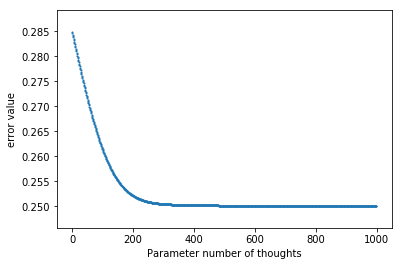

In [16]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json


class Neuron:

    def __init__(self, a1, a2, b, v):
        self._a1 = a1  # 重みパラメータa1
        self._a2 = a2  # 重みパラメータa2        
        self._b = b  # バイアス
        self._v = v  # ハイパーパラメータ
        self._error = None  

    def input_layer(self, x1, x2):
        """線形変換
        param1 : x (入力値)
        return : 入力値
        """
        y = self._a1*x1 + self._a2*x2 + self._b
        return y

    def activation_function(self, y):
        """活性化関数
        param1 : y (入力層の計算結果)
        return : 出力値
        """
        s = 1 / (1 + math.e**-y)  # シグモイド関数
        return s

    def error_function(self, s, answer):
        """誤差関数
        param1 :  s (出力値)
        param2 :  answer (正解値)
        return : 誤差
        """
        error = sum((s - answer)**2)/len(answer)  # 平均二乗誤差関数
        return error

    def parameter_update(self, x1, x2, answer, predicted_data):
        """パラメータ更新
        param1 : x1(入力1)
        param2 : x2(入力2)
        param3 : answer (正解値)
        param4 : predicted_data (予測データ)
        return : 更新済みパラメータ
        """
        self._a1 = self._a1 - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(x1-predicted_data)))))  # 重みパラメータa1
        self._a2 = self._a2 - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(x2-predicted_data)))))  # 重みパラメータa2       
        self._b = self._b - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(1-predicted_data))))) # バイアス
        return self._a1, self._a2, self._b

if __name__=='__main__':
    data = q5_data_XOR  # [入力1, 入力2 , 正解データ] 
    
    a1 = 0.5   # 初期値のパラメータa1
    a2 = 0.5   # 初期値のパラメータa2
    b = 0.3  # バイアス
    v = 0.1  # ハイパーパラメータ(調整項)
    error_list = []  # 誤差リスト(出力用に集計)
    neuron = Neuron(a1, a2, b, v)  # インスタンス化 
    parameter = {"a1":[], "a2":[], "b":[]}

    for _ in range(1000):
        y = neuron.input_layer(data[:,0], data[:,1])  # 入力層
        s = neuron.activation_function(y)  # 中間層
        error = neuron.error_function(s, data[:,2])  # 出力層　： 誤差関数

        a1, a2, b = neuron.parameter_update(data[:,0], data[:,1], data[:,2], s)  # パラメータ更新(引数: 入力x , 正解z, 出力s)
        parameter["a1"].append(a1)        
        parameter["a2"].append(a2)
        parameter["b"].append(b)

        print("誤差 : ", error)
        error_list.append(error)

    # 更新済みパラメータ保存
    # print("書き出し parameter : ", parameter)
    with open('output/output_Q4.json', 'w') as f:
        json.dump(parameter, f)
            
    # 描画
    print("最終パラメータ a 1: ", parameter["a1"][-1])
    print("最終パラメータ a 2: ", parameter["a2"][-1])
    print("最終パラメータ b : ", parameter["b"][-1])
    print("最終誤差: ", error_list[-1])
    print("学習回数 : %s 回" % len(error_list))
    plt.scatter(np.arange(len(error_list)),error_list, s=1, marker='o')
    plt.xlabel('Parameter number of thoughts')
    plt.ylabel('error value')
    plt.show()



# A. 「作成できない場合には、その理由について述べよ。」

### 結果を見ると、誤差の値は0.25付近から下がらなくなっているので分類ができていない。

理由として、  
- 今回作成しているパーセプトロン(図は以下)の構成では入力層に線形変換式が使われている。
- 論理否定、論理和、論理積は線形で分類可能だが、排他的論理和では曲線でないと分類することができない為。(具体例は以下)


<table>
<tbody>
<tr>
<td width="25%">
<img src="images/XOR_1.png"/>
    <p>排他的論理和</p>
</td>
<td width="25%">
<img src="images/XOR_2.png"/>
    <p>論理否定、論理和、論理積</p>
</td>
</tr>
</tbody>
</table>

# PyTorch を用いたパーセプトロンの実装

# Q. <br>「Numpy を用いたパーセプトロンの実装」の問いを<br> PyTorch を用いて解いてみよ。<br><br>その際には、GPU を用いること。<br>GPU を搭載したマシンを持っていない場合は、<br>AWS や GCP などの GPU インスタンスを用いること。

### 解答1(論理否定). <br>「Numpy を用いたパーセプトロンの実装」の問いを<br>PyTorch を用いて解いてみよ。
# まず、CPUで回答をこちらに記載します。<br>( GPU対応はtensorに　device="cuda" を設定する。AWSにて)

In [160]:
# 使うモジュールのインポート
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# 論理否定(解答1)

### データ  
x_1 = 0, 1  入力値  
answer_1 = 1, 0  正解値

In [169]:
x_1 = torch.tensor([[0.],[1.]], dtype=torch.float) # 入力値(型を設定しないとエラーになる)
print("x_1(入力値) : ",x_1)
### w = torch.randn(1,1)  # 重み(w)はPytorchのnn.Linearモジュールに組み込まれているので設定不要
initial_bias_1 = 0.5  # バイアス
answer_1 = torch.tensor([[1.],[0.]], dtype=torch.float)  # 正解値(型を設定しないとエラーになる)
print("answer_1(正解値) : ",answer_1)

x_1(入力値) :  tensor([[0.],
        [1.]])
answer_1(正解値) :  tensor([[1.],
        [0.]])


In [170]:
#ネットワークの定義 (回帰直線)
class Net_1(nn.Module):  # nn.Module 継承
    def __init__(self, initial_bias_1):  # 初期化時にbias設定
        super(Net_1, self).__init__()  # 後方互換のためだけのもの?
    
        # nn.Linear(入力次元, 出力次元, bias)  ニューロンの層とその要素数とbiasを設定
        self.y = nn.Linear(in_features=1,out_features=1, bias=initial_bias_1)  
   
    def forward(self, x_1):  # 上で定義した線形関数のx_1を入力した状態
        # s = F.relu(self.y(x_1))  # 入力層から与えられ線形回帰結果y を活性化関数(ReLU)に与えている
        s = F.sigmoid(self.y(x_1))  # 入力層から与えられ線形回帰結果y を活性化関数(Sigmoid)に与えている

        return s

In [171]:
# 学習実行
def main():
    loss_list = []  # 誤差リスト

    ### device = "cuda" if torch.cuda.is_available() else "cpu"  # もしGPUが使えるならcudaにしてくださいの意味
    # ネットワーク定義
    net = Net_1(initial_bias_1)
    #print('w:', net.linl.weight)
    # 損失関数
    criterion = nn.MSELoss()  # 平均二乗誤差の用意(nn.MSELoss())
    # 最適化関数(torch.optim): SGD(確率的勾配降下法) net.parameters():netインスタンス内のパラメータを(今回は組み込みパラメータw)最適化==極小値を求める
    optimizer = torch.optim.SGD(net.parameters(), lr=0.1)  #  lr=ハイパーパラメータ

    # 学習
    for epoch in range(100):
        # 勾配の初期化
        optimizer.zero_grad()  # 勾配を0にしましょう  0にしないと欠損値が入っているので必ずこれが必要
        s_pred = net(x_1)  # Netクラスのnetインスタンスにx_1(入力値)を与える
        # print("s_pred : ",s_pred)  # ニューロンの出力値(予測値)
        ### print("y_pred.dtype: ", y_pred.dtype)  # 型チェック
        ### print("answer_1.dtype: ", answer_1.dtype)  # 型チェック
        loss = criterion(s_pred, answer_1)  # 予測結果と正解値の誤差(nn.MSELoss()  # 平均二乗誤差)を求めている
        # 勾配の計算
        loss.backward()  # 微分準備+微分実行
        # パラメータの更新
        optimizer.step()  # パラメータwを更新させて新しいwに変えている
        #print(net.linl.weight)  # パラメータw(重み)を見ることができる
        loss_list.append(loss.data.item())  # 誤差をリストへ保存
    return loss_list

Text(0, 0.5, 'loss')

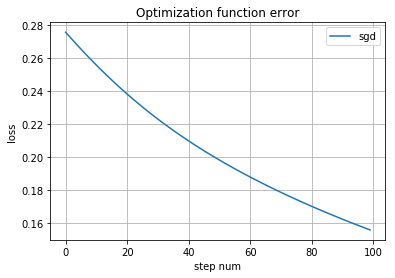

In [172]:
# 最適化関数
loss_sgd = []  #　最適化された誤差リスト
loss_sgd = main() #　学習実行し、最適化された誤差リストへ

# グラフで見てみる
import matplotlib.pyplot as plt
plt.figure() # 描画用ウィンドウを用意する
plt.plot(loss_sgd,label="sgd")  # ラベル付きグラフ描画
plt.title('Optimization function error') # タイトル
plt.legend() # ラベル描画枠を用意
plt.grid()  # メモリ表示
plt.xlabel('step num')  # x軸名
plt.ylabel('loss')  # y軸名

# 論理和(解答2)

### データ  
x_2 = [0,0], [0,1],[1,0],[1,1]  入力値  
y = 0, 1, 1, 1　　正解値

In [173]:
x_2 = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float) # 入力値(型を設定しないとエラーになる)
print("x_2(入力値) : ",x_2)
### w = torch.randn(1,1)  # 重み(w)はPytorchのnn.Linearモジュールに組み込まれているので設定不要
initial_bias_2 = 0.5  # バイアス
answer_2 = torch.tensor([0,1,1,1], dtype=torch.float)  # 正解値(型を設定しないとエラーになる)
print("answer_2(正解値) : ",answer_2)

x_2(入力値) :  tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
answer_2(正解値) :  tensor([0., 1., 1., 1.])


In [174]:
#ネットワークの定義 (回帰直線)
class Net_2(nn.Module):  # nn.Module 継承
    def __init__(self, initial_bias_2):  # 初期化時にbias設定
        super(Net_2, self).__init__()  # 後方互換のためだけのもの?
    
        # nn.Linear(入力次元, 出力次元, bias)  ニューロンの層とその要素数とbiasを設定
        self.y = nn.Linear(in_features=2,out_features=1, bias=initial_bias_2)  
   
    def forward(self, x_2):  # 上で定義した線形関数のx_2を入力した状態
        # s = F.relu(self.y(x_2))  # 入力層から与えられ線形回帰結果y を活性化関数(ReLU)に与えている
        s = F.sigmoid(self.y(x_2))  # 入力層から与えられ線形回帰結果y を活性化関数(Sigmoid)に与えている
        return s

In [175]:
def main():
    loss_list = []  # 誤差リスト

    ### device = "cuda" if torch.cuda.is_available() else "cpu"  # もしGPUが使えるならcudaにしてくださいの意味
    # ネットワーク定義
    net = Net_2(initial_bias_2)
    #print('w:', net.linl.weight)
    # 損失関数
    criterion = nn.MSELoss()  # 平均二乗誤差の用意(nn.MSELoss())
    # 最適化関数(torch.optim): SGD(確率的勾配降下法) net.parameters():netインスタンス内のパラメータを(今回は組み込みパラメータw)最適化==極小値を求める
    optimizer = torch.optim.SGD(net.parameters(), lr=0.1)  #  lr=ハイパーパラメータ

    # 学習
    for epoch in range(100):
        # 勾配の初期化
        optimizer.zero_grad()  # 勾配を0にしましょう  0にしないと欠損値が入っているので必ずこれが必要
        s_pred = net(x_2)  # Netクラスのnetインスタンスにx_2(入力値)を与える
        # print("s_pred : ",s_pred)  # ニューロンの出力値(予測値)
        ### print("y_pred.dtype: ", y_pred.dtype)  # 型チェック
        ### print("answer_2.dtype: ", answer_2.dtype)  # 型チェック
        loss = criterion(s_pred, answer_2)  # 予測結果と正解値の誤差(nn.MSELoss()  # 平均二乗誤差)を求めている
        # 勾配の計算
        loss.backward()  # 微分準備+微分実行
        # パラメータの更新
        optimizer.step()  # パラメータwを更新させて新しいwに変えている
        #print(net.linl.weight)  # パラメータw(重み)を見ることができる
        loss_list.append(loss.data.item())  # 誤差をリストへ保存
    return loss_list

Text(0, 0.5, 'loss')

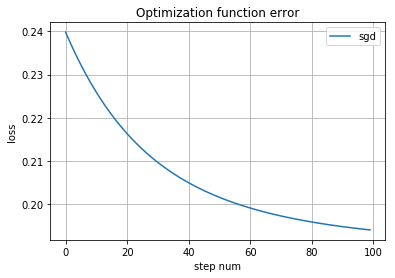

In [176]:
# 最適化関数
loss_sgd = []  #　最適化された誤差リスト
loss_sgd = main() #　学習実行し、最適化された誤差リストへ

# グラフで見てみる
import matplotlib.pyplot as plt
plt.figure() # 描画用ウィンドウを用意する
plt.plot(loss_sgd,label="sgd")  # ラベル付きグラフ描画
plt.title('Optimization function error') # タイトル
plt.legend() # ラベル描画枠を用意
plt.grid()  # メモリ表示
plt.xlabel('step num')  # x軸名
plt.ylabel('loss')  # y軸名

# 論理積(解答3)

### データ  
x_3 = [0,0], [0,1],[1,0],[1,1]  入力値  
answer_3 = 0, 0, 0, 1　　正解値

In [181]:
x_3 = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float) # 入力値(型を設定しないとエラーになる)
print("x_3(入力値) : ",x_3)
### w = torch.randn(1,1)  # 重み(w)はPytorchのnn.Linearモジュールに組み込まれているので設定不要
initial_bias_3 = 0.5  # バイアス
answer_3 = torch.tensor([0,0,0,1], dtype=torch.float)  # 正解値(型を設定しないとエラーになる)
print("answer_3(正解値) : ",answer_3)

x_3(入力値) :  tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
answer_3(正解値) :  tensor([0., 0., 0., 1.])


In [178]:
#ネットワークの定義 (回帰直線)
class Net_3(nn.Module):  # nn.Module 継承
    def __init__(self, initial_bias_3):  # 初期化時にbias設定
        super(Net_3, self).__init__()  # 後方互換のためだけのもの?
    
        # nn.Linear(入力次元, 出力次元, bias)  ニューロンの層とその要素数とbiasを設定
        self.y = nn.Linear(in_features=2,out_features=1, bias=initial_bias_3)  
   
    def forward(self, x_3):  # 上で定義した線形関数のx_2を入力した状態
        # s = F.relu(self.y(x_3))  # 入力層から与えられ線形回帰結果y を活性化関数(ReLU)に与えている
        s = F.sigmoid(self.y(x_3))  # 入力層から与えられ線形回帰結果y を活性化関数(Sigmoid)に与えている
        return s

In [179]:
def main():
    loss_list = []  # 誤差リスト

    ### device = "cuda" if torch.cuda.is_available() else "cpu"  # もしGPUが使えるならcudaにしてくださいの意味
    # ネットワーク定義
    net = Net_3(initial_bias_3)
    #print('w:', net.linl.weight)
    # 損失関数
    criterion = nn.MSELoss()  # 平均二乗誤差の用意(nn.MSELoss())
    # 最適化関数(torch.optim): SGD(確率的勾配降下法) net.parameters():netインスタンス内のパラメータを(今回は組み込みパラメータw)最適化==極小値を求める
    optimizer = torch.optim.SGD(net.parameters(), lr=0.1)  #  lr=ハイパーパラメータ

    # 学習
    for epoch in range(100):
        # 勾配の初期化
        optimizer.zero_grad()  # 勾配を0にしましょう  0にしないと欠損値が入っているので必ずこれが必要
        s_pred = net(x_3)  # Netクラスのnetインスタンスにx_3(入力値)を与える
        # print("s_pred : ",s_pred)  # ニューロンの出力値(予測値)
        ### print("y_pred.dtype: ", y_pred.dtype)  # 型チェック
        ### print("answer_3.dtype: ", answer_3.dtype)  # 型チェック
        loss = criterion(s_pred, answer_3)  # 予測結果と正解値の誤差(nn.MSELoss()  # 平均二乗誤差)を求めている
        # 勾配の計算
        loss.backward()  # 微分準備+微分実行
        # パラメータの更新
        optimizer.step()  # パラメータwを更新させて新しいwに変えている
        #print(net.linl.weight)  # パラメータw(重み)を見ることができる
        loss_list.append(loss.data.item())  # 誤差をリストへ保存
    return loss_list

Text(0, 0.5, 'loss')

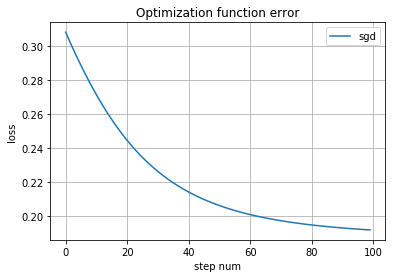

In [180]:
# 最適化関数
loss_sgd = []  #　最適化された誤差リスト
loss_sgd = main() #　学習実行し、最適化された誤差リストへ

# グラフで見てみる
import matplotlib.pyplot as plt
plt.figure() # 描画用ウィンドウを用意する
plt.plot(loss_sgd,label="sgd")  # ラベル付きグラフ描画
plt.title('Optimization function error') # タイトル
plt.legend() # ラベル描画枠を用意
plt.grid()  # メモリ表示
plt.xlabel('step num')  # x軸名
plt.ylabel('loss')  # y軸名

# 排他的論理和(解答4)

### データ  
x_4 = [0,0], [0,1],[1,0],[1,1]  入力値  
answer_4 = 0, 1, 1, 0　　正解値

In [182]:
x_4 = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float) # 入力値(型を設定しないとエラーになる)
print("x_4(入力値) : ",x_4)
### w = torch.randn(1,1)  # 重み(w)はPytorchのnn.Linearモジュールに組み込まれているので設定不要
initial_bias_4 = 0.5  # バイアス
answer_4 = torch.tensor([0,1,1,0], dtype=torch.float)  # 正解値(型を設定しないとエラーになる)
print("answer_4(正解値) : ",answer_4)

x_4(入力値) :  tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
answer_4(正解値) :  tensor([0., 1., 1., 0.])


In [183]:
#ネットワークの定義 (回帰直線)
class Net_4(nn.Module):  # nn.Module 継承
    def __init__(self, initial_bias_4):  # 初期化時にbias設定
        super(Net_4, self).__init__()  # 後方互換のためだけのもの?
    
        # nn.Linear(入力次元, 出力次元, bias)  ニューロンの層とその要素数とbiasを設定
        self.y = nn.Linear(in_features=2,out_features=1, bias=initial_bias_4)  
   
    def forward(self, x_4):  # 上で定義した線形関数のx_2を入力した状態
        # s = F.relu(self.y(x_4))  # 入力層から与えられ線形回帰結果y を活性化関数(ReLU)に与えている
        s = F.sigmoid(self.y(x_4))  # 入力層から与えられ線形回帰結果y を活性化関数(Sigmoid)に与えている
        return s

In [186]:
def main():
    loss_list = []  # 誤差リスト

    ### device = "cuda" if torch.cuda.is_available() else "cpu"  # もしGPUが使えるならcudaにしてくださいの意味
    # ネットワーク定義
    net = Net_4(initial_bias_4)
    #print('w:', net.linl.weight)
    # 損失関数
    criterion = nn.MSELoss()  # 平均二乗誤差の用意(nn.MSELoss())
    # 最適化関数(torch.optim): SGD(確率的勾配降下法) net.parameters():netインスタンス内のパラメータを(今回は組み込みパラメータw)最適化==極小値を求める
    optimizer = torch.optim.SGD(net.parameters(), lr=0.1)  #  lr=ハイパーパラメータ

    # 学習
    for epoch in range(10000):
        # 勾配の初期化
        optimizer.zero_grad()  # 勾配を0にしましょう  0にしないと欠損値が入っているので必ずこれが必要
        s_pred = net(x_4)  # Netクラスのnetインスタンスにx_4(入力値)を与える
        # print("s_pred : ",s_pred)  # ニューロンの出力値(予測値)
        ### print("y_pred.dtype: ", y_pred.dtype)  # 型チェック
        ### print("answer_4.dtype: ", answer_4.dtype)  # 型チェック
        loss = criterion(s_pred, answer_4)  # 予測結果と正解値の誤差(nn.MSELoss()  # 平均二乗誤差)を求めている
        # 勾配の計算
        loss.backward()  # 微分準備+微分実行
        # パラメータの更新
        optimizer.step()  # パラメータwを更新させて新しいwに変えている
        #print(net.linl.weight)  # パラメータw(重み)を見ることができる
        loss_list.append(loss.data.item())  # 誤差をリストへ保存
    return loss_list

Text(0, 0.5, 'loss')

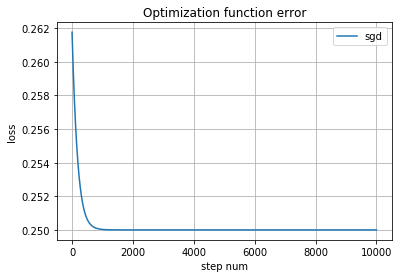

In [187]:
# 最適化関数
loss_sgd = []  #　最適化された誤差リスト
loss_sgd = main() #　学習実行し、最適化された誤差リストへ

# グラフで見てみる
import matplotlib.pyplot as plt
plt.figure() # 描画用ウィンドウを用意する
plt.plot(loss_sgd,label="sgd")  # ラベル付きグラフ描画
plt.title('Optimization function error') # タイトル
plt.legend() # ラベル描画枠を用意
plt.grid()  # メモリ表示
plt.xlabel('step num')  # x軸名
plt.ylabel('loss')  # y軸名